In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''---------------------------------------- batting statistics data -----------------------------------'''

'---------------------------------------- batting statistics data -----------------------------------'

In [3]:
# Load the data
file_path = 't20worldcup stats.xlsx'  
batting_stats = pd.read_excel('t20worldcup stats.xlsx', sheet_name='batting_stats_for_icc_mens_t20_')
batting_stats

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.50,25.00,0,0,1
1,Aaron Jones,United States of America,6,6,2,162,94,40.50,135.00,0,1,1
2,Aasif Sheikh,Nepal,3,3,0,63,42,21.00,88.73,0,0,0
3,Abbas Afridi,Pakistan,1,1,0,17,17,17.00,80.95,0,0,0
4,F Achelam,Uganda,1,1,0,9,9,9.00,69.23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,D Wiese,Namibia,4,4,1,51,27,17.00,127.50,0,0,0
243,KS Williamson,New Zealand,4,3,1,28,18*,14.00,87.50,0,0,0
244,SA Yadav,India,8,8,1,199,53,28.42,135.37,0,2,0
245,A Zampa,Australia,7,1,0,9,9,9.00,128.57,0,0,0


In [4]:
'''
Player: Player name
Team: Team name
Mat: Matches played
Inns: Innings batted
NO: Not outs
Runs: Total runs scored
HS: Highest score
Ave: Batting average
SR: Strike rate
100: Centuries scored
50: Fifties scored
0: Ducks (score of 0) '''

'\nPlayer: Player name\nTeam: Team name\nMat: Matches played\nInns: Innings batted\nNO: Not outs\nRuns: Total runs scored\nHS: Highest score\nAve: Batting average\nSR: Strike rate\n100: Centuries scored\n50: Fifties scored\n0: Ducks (score of 0) '

In [5]:
# Clean and prepare the data
batting_stats.columns = batting_stats.columns.str.strip()  # Standardize column names
batting_stats_cleaned = batting_stats.dropna(subset=['Runs', 'SR', 'Ave'])

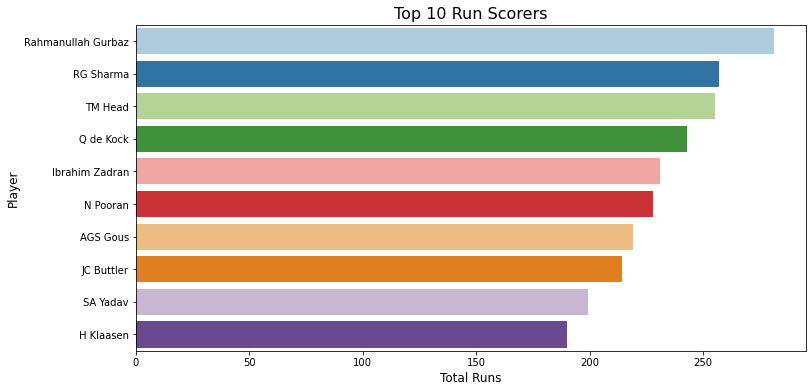

In [6]:
#Bar Plot - Top 10 Run Scorers
top_scorers = batting_stats_cleaned.nlargest(10, 'Runs')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scorers, x='Runs', y='Player', palette='Paired')
plt.title('Top 10 Run Scorers', fontsize=16)
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.show()


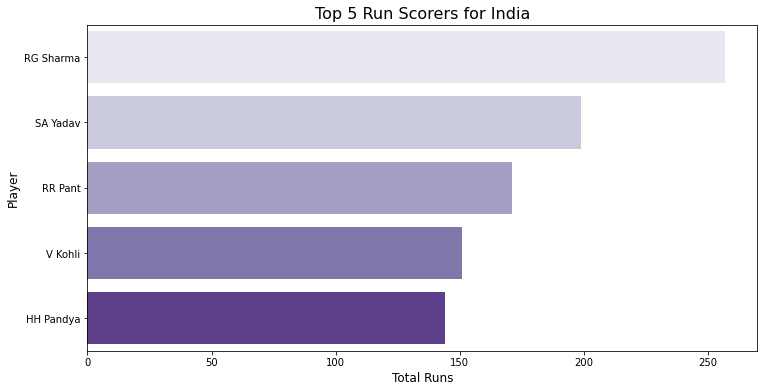

In [7]:
# Filter data for Indian players
indian_players = batting_stats_cleaned[batting_stats_cleaned['Team'] == 'India']

# top 5 run-scorers for India
top_indian_scorers = indian_players.nlargest(5, 'Runs')

# Bar Plot - Top 5 Run Scorers for India
plt.figure(figsize=(12, 6))
sns.barplot(data=top_indian_scorers, x='Runs', y='Player', palette='Purples')
plt.title('Top 5 Run Scorers for India', fontsize=16)
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.show()


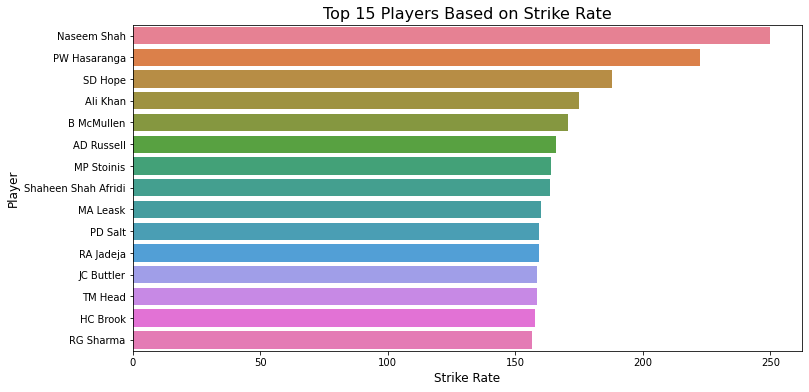

In [8]:
#Bar Plot - Top 15 Players Based on Average Strike Rate
top_strike_rate_players = batting_stats_cleaned.nlargest(15, 'SR')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_strike_rate_players, x='SR', y='Player', palette='husl')
plt.title('Top 15 Players Based on Strike Rate', fontsize=16)
plt.xlabel('Strike Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.show()


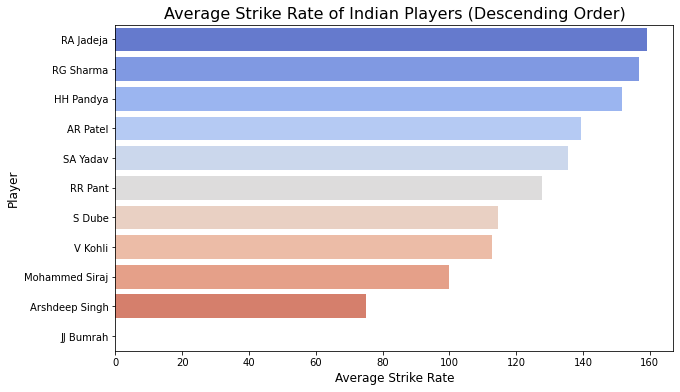

In [9]:
# Filter data for Indian players
indian_players = batting_stats_cleaned[batting_stats_cleaned['Team'] == 'India']

# Calculate average strike rate by player and sort in descending order
average_sr = indian_players.groupby('Player')['SR'].mean().reset_index()
average_sr = average_sr.sort_values(by='SR', ascending=False)

# Average Strike Rate of Indian Players
plt.figure(figsize=(10, 6))
sns.barplot(data=average_sr, x='SR', y='Player', palette='coolwarm')
plt.title('Average Strike Rate of Indian Players (Descending Order)', fontsize=16)
plt.xlabel('Average Strike Rate', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.show()


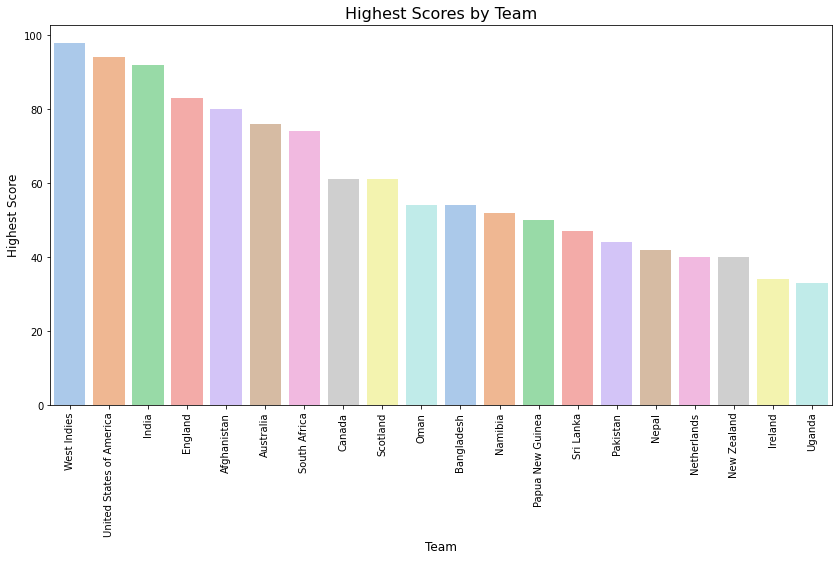

In [10]:
# Ensure the 'HS' column is treated as numeric, and handle any potential issues with non-numeric values
batting_stats_cleaned['HS'] = pd.to_numeric(batting_stats_cleaned['HS'], errors='coerce')

# Calculate the highest score by team
highest_scores_by_team = batting_stats_cleaned.groupby('Team')['HS'].max().reset_index()
highest_scores_by_team  = highest_scores_by_team .sort_values(by='HS', ascending=False)


# Highest Scores by Team
plt.figure(figsize=(14, 7))
sns.barplot(data=highest_scores_by_team, x='Team', y='HS', palette='pastel')
plt.title('Highest Scores by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Highest Score', fontsize=12)
plt.xticks(rotation=90)  # Rotate team names for better readability
plt.show()


In [11]:
'''---------------------------------------- bowling statistics data -----------------------------------'''

'---------------------------------------- bowling statistics data -----------------------------------'

In [12]:
'''The bowling statistics data contains the following key columns:

Player: Name of the player.
Team: The team the player represents.
Mat: Number of matches played.
Inns: Number of innings bowled.
Balls: Number of balls bowled.
Mdns: Number of maiden overs.
Runs: Runs conceded.
Wkts: Wickets taken.
BBI: Best bowling in an innings.
Ave: Bowling average.
Econ: Economy rate.
SR: Bowling strike rate.
5: Number of 5-wicket hauls.
10: Number of 10-wicket hauls.
Ct: Catches taken.
'''

'The bowling statistics data contains the following key columns:\n\nPlayer: Name of the player.\nTeam: The team the player represents.\nMat: Number of matches played.\nInns: Number of innings bowled.\nBalls: Number of balls bowled.\nMdns: Number of maiden overs.\nRuns: Runs conceded.\nWkts: Wickets taken.\nBBI: Best bowling in an innings.\nAve: Bowling average.\nEcon: Economy rate.\nSR: Bowling strike rate.\n5: Number of 5-wicket hauls.\n10: Number of 10-wicket hauls.\nCt: Catches taken.\n'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 't20worldcup stats.xlsx'
bowling_stats = pd.read_excel('t20worldcup stats.xlsx', sheet_name='bowling_stats_for_icc_mens_t20_')

In [14]:
bowling_stats.head()

,Player,Team,Mat,Inns,Balls,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,5,10,Ct
0,NP Kenjige,United States of America,4,4,60,0,89,3,2024-03-30 00:00:00,29.66,8.90,20,0,0,0
1,Abbas Afridi,Pakistan,1,1,18,0,31,0,-,0.00,10.33,-,0,0,0
2,MR Adair,Ireland,3,3,72,0,74,3,2024-01-23 00:00:00,24.66,6.16,24,0,0,1
3,AC Agar,Australia,2,2,48,1,56,1,1939-01-01 00:00:00,56.00,7.00,48,0,0,1
4,DS Airee,Nepal,3,3,57,0,49,6,2024-03-21 00:00:00,8.16,5.15,9.5,0,0,3


In [15]:
# Clean and convert necessary columns to numeric
bowling_stats['Wkts'] = pd.to_numeric(bowling_stats['Wkts'], errors='coerce')
bowling_stats['Team'] = bowling_stats['Team'].astype(str)

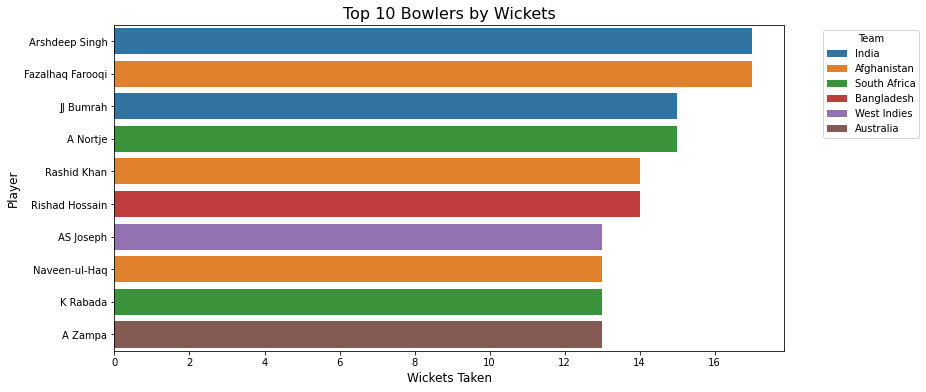

In [17]:
# Extract the top 10 bowlers by wickets
top_10_bowlers = bowling_stats.nlargest(10, 'Wkts')

# Top 10 Bowlers by Wickets with their names and teams
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_bowlers, x='Wkts', y='Player', hue='Team', dodge=False, palette='tab10')
plt.title('Top 10 Bowlers by Wickets', fontsize=16)
plt.xlabel('Wickets Taken', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


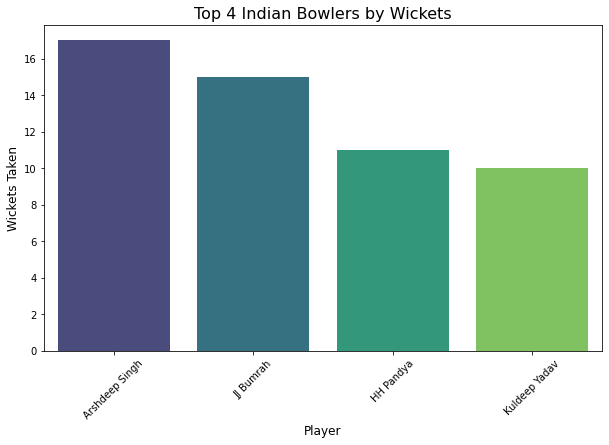

In [18]:
# Top 4 Indian Bowlers by Wickets
indian_bowlers = bowling_stats[bowling_stats['Team'] == 'India']
top_4_indian_bowlers = indian_bowlers.nlargest(4, 'Wkts')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_4_indian_bowlers, x='Player', y='Wkts', palette='viridis')
plt.title('Top 4 Indian Bowlers by Wickets', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Wickets Taken', fontsize=12)
plt.xticks(rotation=45)
plt.show()

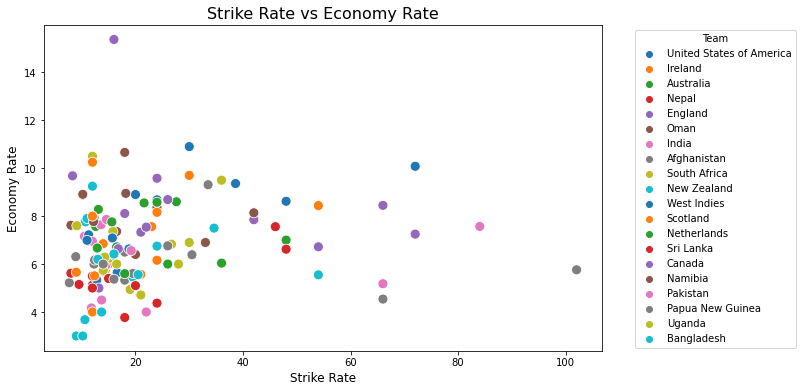

In [19]:
# Clean and handle non-numeric values in 'SR' and 'Econ' columns
bowling_stats['SR'] = pd.to_numeric(bowling_stats['SR'], errors='coerce')
bowling_stats['Econ'] = pd.to_numeric(bowling_stats['Econ'], errors='coerce')

# Drop rows with missing or invalid values in 'SR' or 'Econ'
scatter_data = bowling_stats.dropna(subset=['SR', 'Econ'])

#Strike Rate vs Economy Rate (Scatter Plot): Examines the relationship between economy and strike rate
# Strike Rate vs Economy Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=scatter_data, 
    x='SR', 
    y='Econ', 
    hue='Team', 
    palette='tab10', 
    s=100, 
    edgecolor='w'
)
plt.title('Strike Rate vs Economy Rate', fontsize=16)
plt.xlabel('Strike Rate', fontsize=12)
plt.ylabel('Economy Rate', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Team")
plt.show()


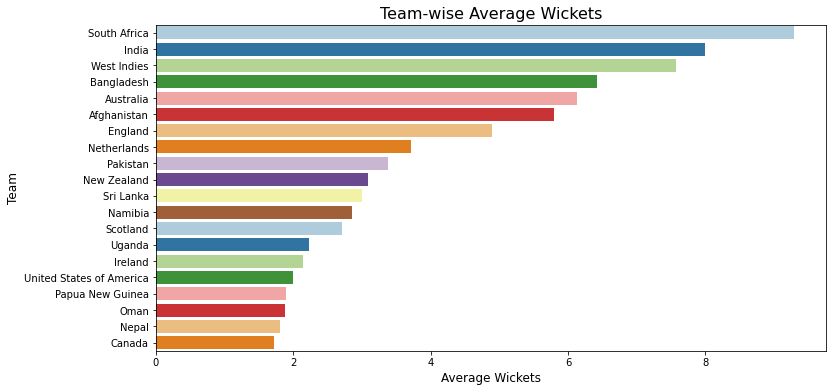

In [22]:
# Calculate the average wickets taken by each team
team_avg_wickets = bowling_stats.groupby('Team')['Wkts'].mean().reset_index().sort_values(by='Wkts', ascending=False)

#Team-wise Average Wickets (Bar Plot): Compares the average wickets taken per team. provide code
#Team-wise Average Wickets
plt.figure(figsize=(12, 6))
sns.barplot(
    data=team_avg_wickets, 
    x='Wkts', 
    y='Team', 
    palette='Paired'
)
plt.title('Team-wise Average Wickets', fontsize=16)
plt.xlabel('Average Wickets', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.show()
